In [9]:
from igraph import *
import numpy as np
import networkx as nx
import igraph
import cairocffi
import matplotlib.pyplot as plt
import pandas as pd

#### TASK 1

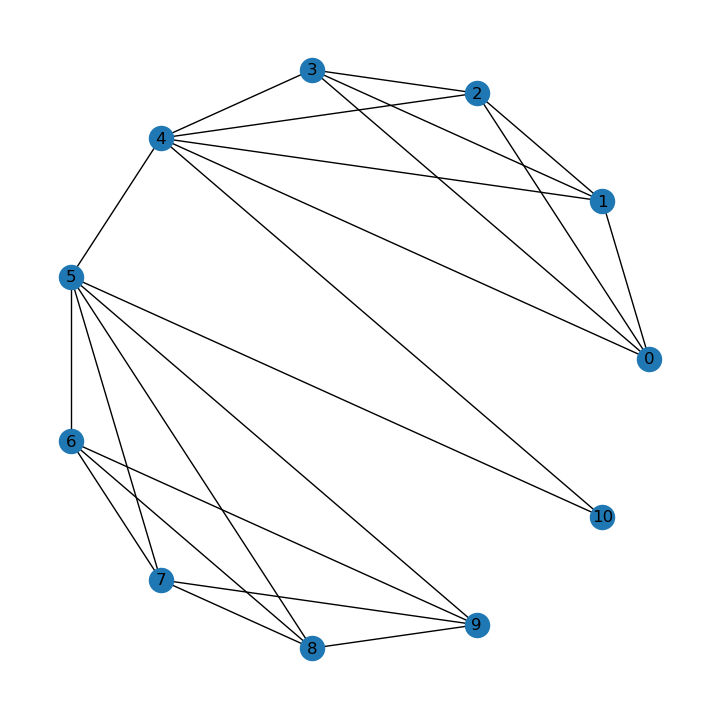

In [116]:
# construct the bellbar graph
# calculate betweenness centrality, centrality of 2nd order

def create_nx():
    n = 5
    clique_degrees = n-1
    circulant_graph = nx.circulant_graph(n=n, offsets=[1])
    adjacency_dict = dict( circulant_graph.adjacency() )
    allowed_degrees = [k for k in range(-clique_degrees, clique_degrees+1) if k != 0]
    for vertex1 in range(n):
        for vertex2 in range(n):
            if ((vertex1 - vertex2) % n) in allowed_degrees:
                adjacency_dict[vertex1][vertex2] = {} 
    nxG = nx.from_dict_of_dicts(adjacency_dict)
    iG = igraph.Graph.from_networkx(nxG)  

    nxG_union = nx.disjoint_union(nxG, nxG1)
    nxG_union.add_node(10)
    nxG_union.add_edge(5, 10)
    nxG_union.add_edge(4, 10)
    nxG_union.add_edge(4, 5)
    return nxG_union

nxG_union = create_nx()

# calculate betweenness centrality
betweennes_cs = nx.betweenness_centrality(nxG_union)
iG_union = ig.Graph.from_networkx(nxG_union)
iG_union.vs['names'] = [round(value, 3) for k, value in betweennes_cs.items()]

# second order centrality
second_order_btw = nx.second_order_centrality(nxG_union)

plt.figure(figsize =(7, 7))
nx.draw_circular(nxG_union, with_labels = True)
plt.show()

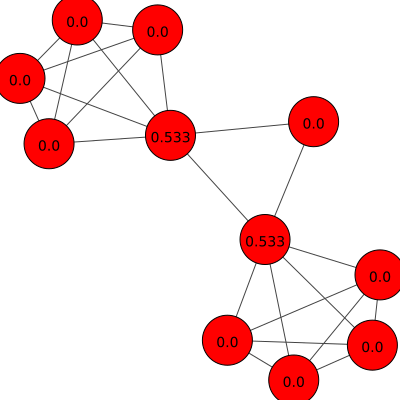

<Figure size 500x500 with 0 Axes>

In [80]:
# plot the graph
plt.figure(figsize=(5, 5))
ig.plot(iG_union,
        vertex_size=50,
        vertex_label=iG_union.vs['names'],
        #edge_label=g.es['weight'],
        bbox=(400, 400)
        )

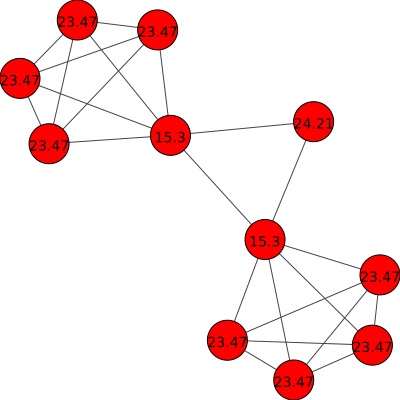

<Figure size 500x500 with 0 Axes>

In [84]:
iG_union.vs['names'] = [round(value, 2) for k, value in second_order_btw.items()]
# plot the graph
plt.figure(figsize=(5, 5))
ig.plot(iG_union,
        vertex_size=40,
        vertex_label=iG_union.vs['names'],
        #edge_label=g.es['weight'],
        bbox=(400, 400)
        )

#### TASK 2

In [110]:
# plot centralities
# delete max by value node and plot
list_of_btws = []
list_of_btws.append(max(betweennes_cs.values()))
nxG_union.remove_node(4)
list_of_btws.append(max(nx.betweenness_centrality(nxG_union).values()))
nxG_union.remove_node(5)
list_of_btws.append(max(nx.betweenness_centrality(nxG_union).values()))

Text(0.5, 0, 'Number of deleted nodes')

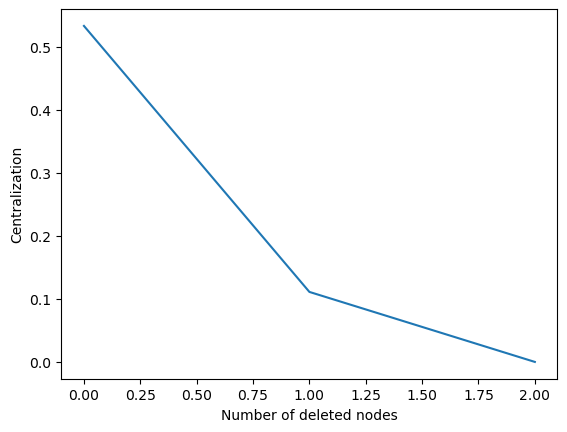

In [113]:
# plot centralities
plt.plot(list_of_btws)
plt.ylabel('Centralization')
plt.xlabel('Number of deleted nodes')

As you can see on the plot above there is a bridge node that has non zero betweenness centrality. When deleting this one the maximum of betweenness centrality values become zero. 

#### TASK 3

In [180]:
nx_karate = nx.karate_club_graph()

In [182]:
# calculate eigenvector centrality
nxG_union = nx_karate #create_nx()
x = nx.betweenness_centrality(nxG_union)
x = np.array([v for v in x.values()])
y = nx.eigenvector_centrality(nxG_union)
y = np.array([v for v in y.values()])

In [183]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x.reshape(-1,1), y)
y_pred = lr.predict(x.reshape(-1,1))

Text(0, 0.5, 'Eigenvector centrality')

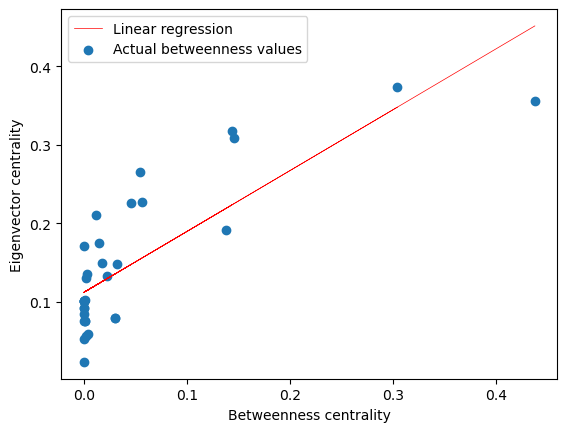

In [184]:
plt.plot(x, y_pred, label = 'Linear regression', c='r', linewidth=0.5)
plt.scatter(x, y, label = 'Actual betweenness values')
plt.legend()
plt.xlabel('Betweenness centrality')
plt.ylabel('Eigenvector centrality')

#### TASK 4

In [151]:
# using adjacency matrix create a graph
# calculate shapley's vector
# range vertices
# using adjacency matrix :
alphabit = {
    'a' : 0, 'b' : 1, 'c' : 2, 'd' : 3, 'e' : 4, 'f' : 5, 'g' : 6, 'h' : 7, 'i': 8, 'j' : 9
}

adj2alph_map = [
    ('a', 'h', 8), 
    ('b', 'a', 3),
    ('c', 'a', 5), ('c', 'd', 5), ('c', 'e', 1),
    ('d', 'c', 6), ('d', 'f', 1),
    ('e', 'b', 6), ('e', 'c', 2),
    ('g', 'a', 7), ('g', 'b', 4), ('g', 'e', 8), ('g', 'h', 3),
    ('h', 'b', 3), ('h', 'f', 9),
    ('i', 'f', 4), ('j', 'f', 1)
]

adjacency_matrix = np.zeros(shape=(len(alphabit), len(alphabit)), dtype=int)

# create graph
for v1, v2, weight in adj2alph_map:
    adjacency_matrix[alphabit[v1], alphabit[v2]] = weight
    
g = ig.Graph.Adjacency((adjacency_matrix > 0).tolist())
g.vs['names'] = [key for key in alphabit.keys()]
g.es['weight'] = adjacency_matrix[adjacency_matrix.nonzero()]

G = nx.DiGraph(adjacency_matrix)
  
# plt.figure(figsize =(5, 5))
# nx.draw_networkx(G, with_labels = True)

In [154]:
degree_centrality = nx.degree_centrality(G)

In [153]:
nx.load_centrality(G)

{0: 0.06944444444444445,
 1: 0.027777777777777776,
 2: 0.1111111111111111,
 3: 0.027777777777777776,
 4: 0.05555555555555555,
 5: 0.0,
 6: 0.0,
 7: 0.05555555555555555,
 8: 0.0,
 9: 0.0}

In [ ]:
# CALCULATE THE PROBABILITY THAT THERE IS A TRIANGLE IN A GRAPH 
# OF 5 NODES AND 6 EDGES

In [282]:
from itertools import combinations, product

In [355]:
%%time
# the most straightfull dumb approach -> calculate all combinations off grapgh
# with 5 nodes and 6 edges, calculate all combinations where a triangle is present
# calculate relation: | graphs that contain any triangle | / | all graphs |

nodes_num = 6
nodes = [n for n in range(nodes_num)]

edge_list = list(product(nodes, nodes))
for i, edge in enumerate(edge_list):
    if (i,i) in edge_list:
        edge_list.remove((i, i))
    if edge[::-1] in edge_list:
        edge_list.remove(edge)
        
all_possible_edge_combinations = list(combinations(edge_list, 5))

counter = 0
for combination in all_possible_edge_combinations:
    #print(combination)
    random_graph = Graph(edges=combination)
    random_graph.vs['names'] = nodes
    if random_graph.list_triangles():
        counter += 1

print(f'All combinations = {len(all_possible_edge_combinations)}, when a tringle occurs = {counter}')
print(f'Concrete dumb probability calculus: P[graph has triange] = {counter/len(all_possible_edge_combinations):.4f}')

All combinations = 3003, when a tringle occurs = 1230
Concrete dumb probability calculus: P[graph has triange] = 0.4096
CPU times: user 88.3 ms, sys: 3.81 ms, total: 92.1 ms
Wall time: 90 ms
